In [53]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold', titlesize=18, titlepad=10)

In [54]:
import pandas as pd
red_wine = pd.read_csv('red-wine.csv')

In [55]:
df_train = red_wine.sample(frac=0.7,random_state=0)
df_valid = red_wine.drop(df_train.index)

In [56]:
x_train = df_train.drop('quality',axis=1)
x_valid = df_valid.drop('quality',axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [57]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024,activation='relu',input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

c:\Users\Raktim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [59]:
history = model.fit(
    x_train,y_train,
    validation_data=(x_valid,y_valid),
    batch_size=256,
    epochs=100,
    verbose=1
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 5.5655 - val_loss: 6.1866
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 5.3719 - val_loss: 4.4706
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5.1616 - val_loss: 4.2246
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.9344 - val_loss: 6.8915
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.6598 - val_loss: 13.3261
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.3506 - val_loss: 4.1393
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.0004 - val_loss: 8.9882
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.6074 - val_loss: 5.5373
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.1567 - val_loss: 3.2604
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2.6784 - val_loss: 1.1888
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2.3465 - val_loss: 1.8518
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.9397 - val_l

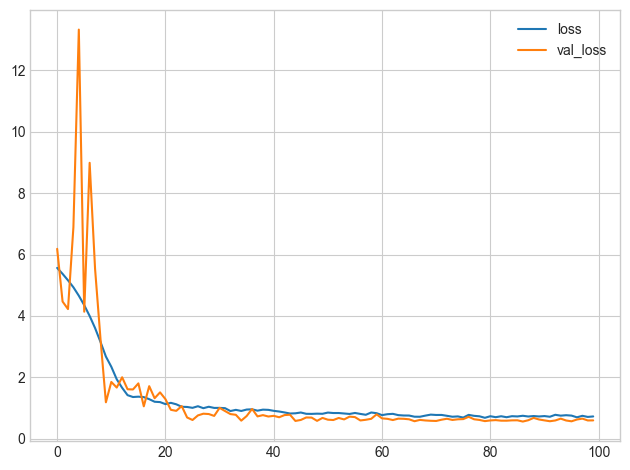

In [60]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();